First few rows of the dataset:
          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         

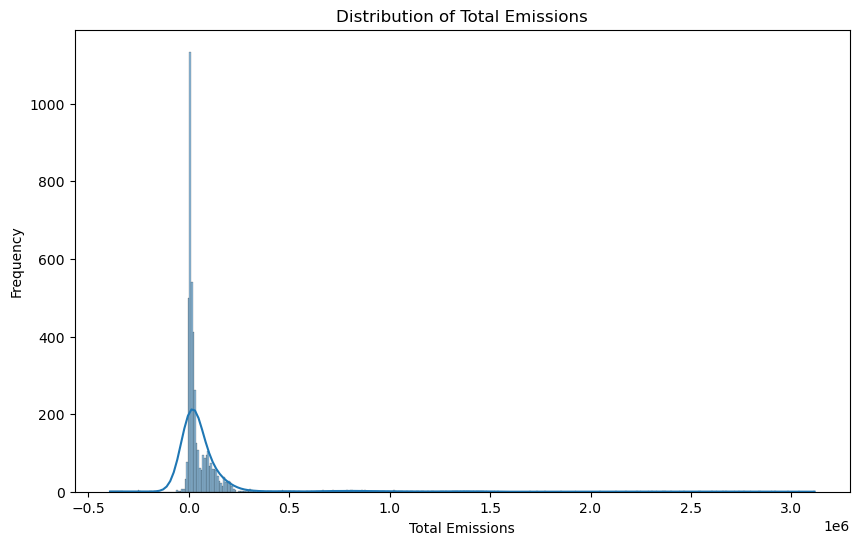

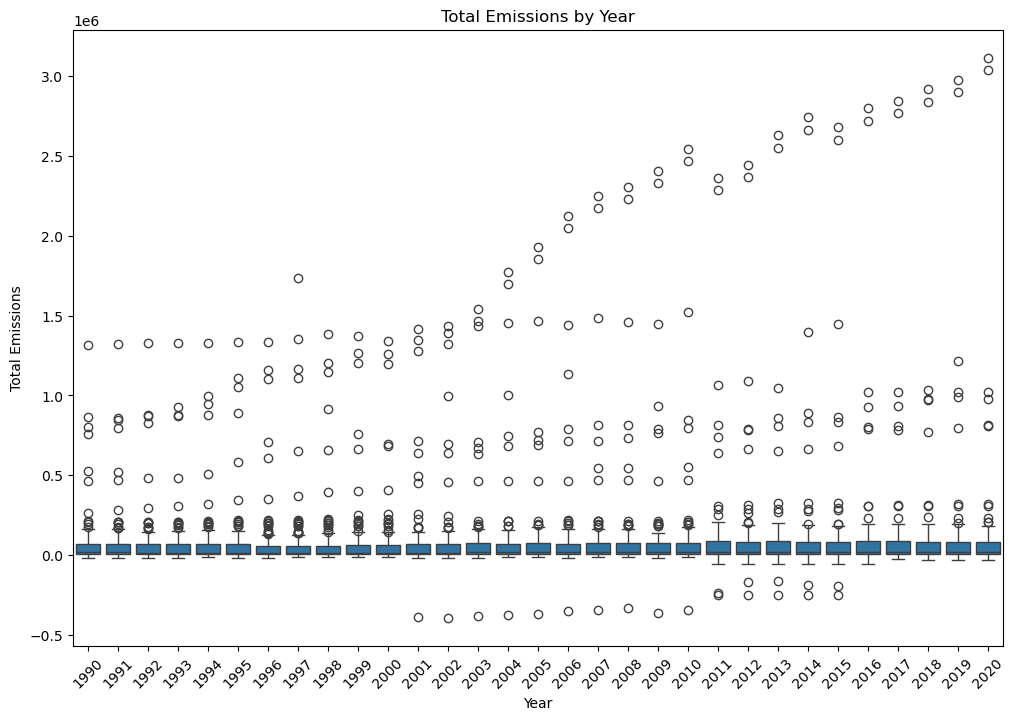

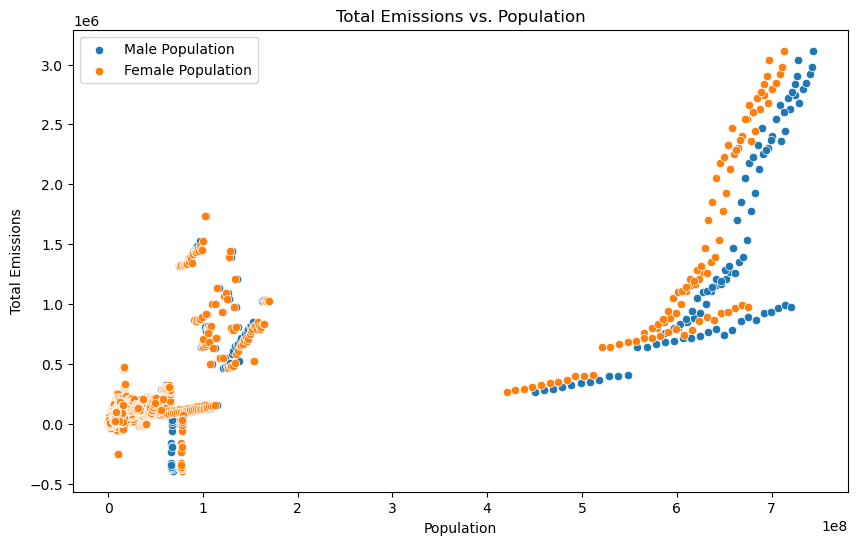

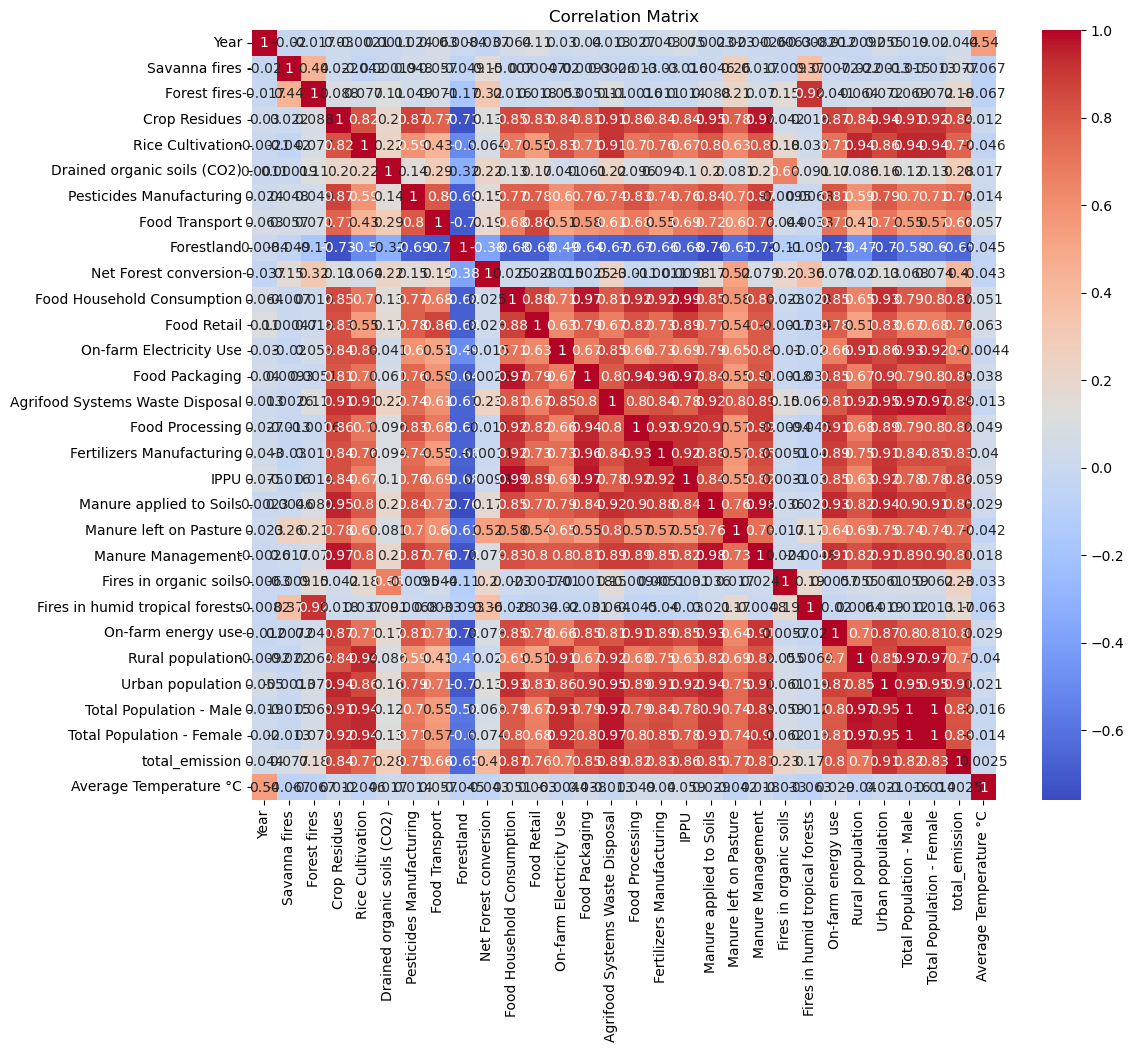

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Cleaning

# Load the dataset
df = pd.read_csv('ThabisoTeamProject.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Handle missing values
# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values with a specific value (e.g., 0 or mean)
# df_cleaned = df.fillna(0)
# df_cleaned = df.fillna(df.mean())

# Convert data types if necessary (example: converting year to integer)
df_cleaned.loc[:, 'Year'] = df_cleaned['Year'].astype(int)

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Display the cleaned dataset
print("Cleaned dataset:")
print(df_cleaned.head())

# Step 2: Exploratory Data Analysis (EDA)

# Summary statistics
print("Summary statistics:")
print(df_cleaned.describe())

# Visualizations

# Histogram of a numerical column (e.g., emissions)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['total_emission'], kde=True)
plt.title('Distribution of Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Frequency')
plt.show()

# Boxplot of emissions by year
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='total_emission', data=df_cleaned)
plt.title('Total Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of emissions vs. population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Population - Male', y='total_emission', data=df_cleaned, label='Male Population')
sns.scatterplot(x='Total Population - Female', y='total_emission', data=df_cleaned, label='Female Population')
plt.title('Total Emissions vs. Population')
plt.xlabel('Population')
plt.ylabel('Total Emissions')
plt.legend()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
# Select only numeric columns for the correlation matrix
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
correlation_matrix = df_cleaned[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()